In [3]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew


data = pd.read_csv('168866123_T_ONTIME.csv') 

In [11]:
data.drop(['Unnamed: 7'], axis = 1 , inplace= True,errors= 'ignore')

In [12]:
print data.head()

   ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  \
0              10135                1013503                  30135   
1              10135                1013503                  30135   
2              10135                1013503                  30135   
3              10135                1013503                  30135   
4              10135                1013503                  30135   

   DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  AIR_TIME  
0            10397              1039705                30397     121.0  
1            10397              1039705                30397     115.0  
2            10397              1039705                30397     108.0  
3            10397              1039705                30397     102.0  
4            10397              1039705                30397     104.0  


In [14]:
#Replace Missing Values with zero
data['AIR_TIME'].fillna(0,inplace=True)

In [15]:

#Uses scale method from scikit-learn to transform the distribution 
#This will not impact Skewness Statistic calculation

AirTime = preprocessing.scale(data['AIR_TIME'])

In [16]:
#Next We calculate Skewness using skew in spicy.stats
skness = skew(AirTime)

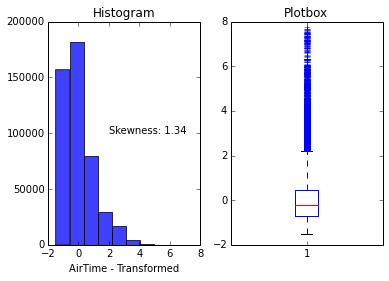

In [50]:
%matplotlib inline

#Draw the histograms 
figure = plt.figure()
figure.add_subplot(121)   
plt.hist(AirTime,facecolor='blue',alpha=0.75) 
plt.xlabel("AirTime - Transformed") 
plt.title("Histogram") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(122) 
plt.boxplot(AirTime)
plt.title("Plotbox")
plt.show()

In [52]:
import numpy as np
from scipy.stats import boxcox

#Change to process the square roots instead of actuals
AirTime = preprocessing.scale(np.sqrt(data['AIR_TIME'])) 

#Shift the values by 1 to get rid of zeros
AirTimeBoxCox = preprocessing.scale(boxcox(data['AIR_TIME']+1)[0])
AirTimeOrig = preprocessing.scale(data['AIR_TIME'])

#Next We calculate Skewness using skew in spicy.stats
skness = skew(AirTime)
sknessBoxCox = skew(AirTimeBoxCox)
sknessOrig = skew(AirTimeOrig)

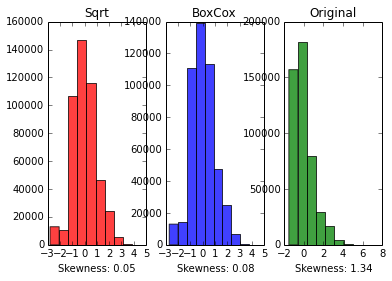

In [60]:
#We draw the histograms 
figure = plt.figure()
figure.add_subplot(131)   
plt.hist(AirTime,facecolor='red',alpha=0.75) 
plt.title("Sqrt") 
plt.xlabel("Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(132) 
plt.hist(AirTimeBoxCox,facecolor='blue',alpha=0.75) 
plt.title("BoxCox") 
plt.xlabel("Skewness: {0:.2f}".format(sknessBoxCox))

figure.add_subplot(133) 
plt.hist(AirTimeOrig,facecolor='green',alpha=0.75) 
plt.title("Original") 
plt.xlabel("Skewness: {0:.2f}".format(sknessOrig))

plt.show()

In [ ]:
'''
Lower Skewness better
It seems that in this case, sqrt the data gets better results than Boxcox
I am trying to check whether this os because of outlisers below... But it seems that not
'''

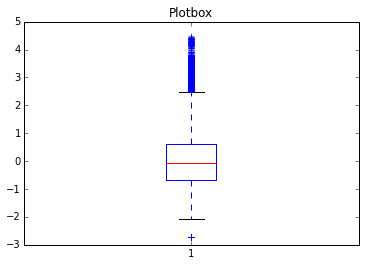

In [61]:
figure = plt.figure()
plt.boxplot(AirTimeBoxCox)
plt.title("Plotbox")
plt.show()

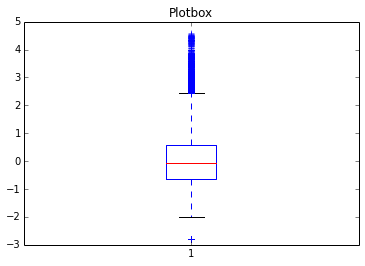

In [62]:
figure = plt.figure()
plt.boxplot(AirTime)
plt.title("Plotbox")
plt.show()